Objective: Implement a KNN model to classify the animals in to categorie

In [ ]:
"""
Created on 15th Aug 2020
@author: Shilpa Chavan
Algorithm : KNN Algorithm
Dataset : Zoo.csv
"""

# Importing Libraries 
import pandas as pd
import numpy as np

# Load the Data

In [16]:
zoo = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\KNN\\Zoo.csv")

# Exploratory data analysis

In [17]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [18]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [19]:
zooData = zoo.drop(['animal name'],axis=1)

In [20]:
zooData.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [21]:
zooData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [22]:
zooData.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# Training and Test dataset

In [23]:
#Training and Test data using 
from sklearn.model_selection import train_test_split
train,test = train_test_split(zooData,test_size = 0.2) # 0.2 => 20 percent of entire data

In [24]:
x_train = train.iloc[:,0:16]
y_train=train.iloc[:,16]

# Getting the optimal K value

In [25]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC

In [26]:
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])

# Visualizing the K Value Vs Accuracy for training & test set

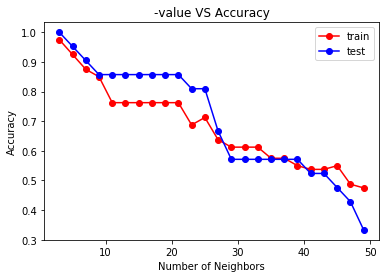

In [56]:

import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")#bo is blue
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(["train","test"])
plt.show()

In above graph k value from 1 to 10 have high accuracy for both train and test set with little diffrence.
so, we will plot graph for k=1 to 10 to get accurate value of k.

In [59]:

# creating empty list variable 
acc1 = []

# running KNN algorithm for 1 to 12 nearest neighbours and 
# storing the accuracy values 
 
for i in range(1,12,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc1 = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc1 = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc1.append([train_acc1,test_acc1])

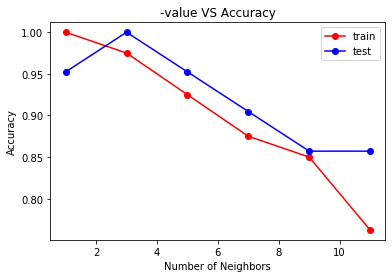

In [60]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(1,12,2),[i[0] for i in acc1],"ro-")

# test accuracy plot
plt.plot(np.arange(1,12,2),[i[1] for i in acc1],"bo-")
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(["train","test"])
plt.show()


In above graph for k=5 train and test have least diffrence in their accuracy.

# Model Training and Evaluation for K=5

In [35]:
# for 5 nearest neighbours
neigh = KNC(n_neighbors=5)

# fitting with training data
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
x_train = train.iloc[:,0:16]
y_train= train.iloc[:,16]
y_pred= neigh.predict(x_train)
# train accuracy 
train_acc = np.mean(y_pred==y_train)
print("Training Accuracy:",train_acc)

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
print("Test Accuracy:",test_acc)

Training Accuracy: 0.925
Test Accuracy: 0.9523809523809523


# Model Validation using cross vaildation method

Using cross vaildation  method to decrease difference between training and test accuracy.

In [51]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNCl

In [52]:
y1=zooData.iloc[:,16] #16th column is our dependent variable
inputvariables1=list(zooData) #it contain list of all columns
del inputvariables1[16] #from that list we deleted 16th column
x1=zooData[inputvariables1] #from rest of column we store data into x

In [53]:
# split the data set into train and test
x_1, x_test, y_1, y_test = model_selection.train_test_split(x1, y1, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
x_tr, x_cv, y_tr, y_cv = model_selection.train_test_split(x_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNCl(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred1 = knn.predict(x_cv)

    # evaluate CV accuracy
    acc1 = accuracy_score(y_cv, pred1, normalize=True) * float(100)
    print('\nCross Validation accuracy for k = %d is %d%%' % (i, acc1))


Cross Validation accuracy for k = 1 is 90%

Cross Validation accuracy for k = 3 is 80%

Cross Validation accuracy for k = 5 is 57%

Cross Validation accuracy for k = 7 is 57%

Cross Validation accuracy for k = 9 is 52%

Cross Validation accuracy for k = 11 is 52%

Cross Validation accuracy for k = 13 is 52%

Cross Validation accuracy for k = 15 is 52%

Cross Validation accuracy for k = 17 is 47%

Cross Validation accuracy for k = 19 is 47%

Cross Validation accuracy for k = 21 is 42%

Cross Validation accuracy for k = 23 is 38%

Cross Validation accuracy for k = 25 is 38%

Cross Validation accuracy for k = 27 is 28%

Cross Validation accuracy for k = 29 is 23%


# Final Model building with k =1 

In [61]:
knn_final= KNCl(1)
knn_final.fit(x_tr,y_tr)
pred_test= knn_final.predict(x_test)
acc_test= accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n Test accuracy for k =1  is %d%%' % (acc_test))


 Test accuracy for k =1  is 96%
